[Versión Interactiva](https://mybinder.org/v2/git/https%3A%2F%2Fgithub.com%2Fjuandadamo%2Fclases_fiuba/629dc9d72fc02a520ecaa069ad820d6b568e96f9?filepath=6731%2Faletas.ipynb)

In [1]:
!pip install matplotlib numpy scipy ht CoolProp

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 899 kB 6.1 MB/s            
  Preparing metadata (setup.py) ... done
     |████                            | 512 kB 7.2 MB/s eta 0:00:01

limit_output extension: Maximum message size of 10000 exceeded with 13587 characters

In [27]:
%matplotlib notebook
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib as mpl
import ht
from scipy.special import erf # doctest: +SCIPY
from IPython.display import Latex
from scipy import optimize
import CoolProp as cp

In [28]:
def temp_aleta(x,y,th,L,k,h_bar,T_infinity,T_b):
    N = 100
    i_serie = np.arange(0,N)
    lambdai = (1+2*i_serie)*np.pi/(2*L)
    Ci = 2*(T_infinity-T_b)/(L*lambdai*(k*lambdai * np.sinh(lambdai*th/2)/h_bar+np.cosh(lambdai*th/2)))
    thetai = Ci*np.sin(lambdai*x)*np.cosh(lambdai*y)
    theta = thetai.sum()
    Temp = theta+T_b
    return Temp


def eta_aleta(th,L,k,h_bar):
    N = 100
    i_serie = np.arange(0,N)
    lambdai = (1+2*i_serie)*np.pi/(2*L)
    eta_i=(2*k/(h_bar*lambdai*L**2))*np.sinh(lambdai*th/2)/(k*lambdai*np.sinh(lambdai* th/2)/h_bar+
np.cosh(lambdai*th/2))
    
    return eta_i.sum()

def eta_1D(th,L,k,h_bar):
    mL = (h_bar*2/(k*th))**0.5*L
    eta = np.tanh(mL)/mL
    return eta

### Aleta 2D
Hallar la solución correspondiente a una aleta de acero bidimensional, de espesor $e=1cm$ ancho $W=20cm$, largo $L=5cm$, con temperatura en su base $T_b=100^\circ$C, sometida a una condición de convección $h = 100 W/m^2 K$ respecto de un fluido circundante a $T_\infty=20^\circ$C.

Grafique la distribución de temperaturas adimensional para $y=0$, compare con el problema unidimensional.

Proponga otros dos valores para el espesor $e$. Grafique, para las 3 condiciones $e$ su efectividad en función del parámetro $\beta L$ y compare el resultado con el problema unidimensional.

<figure class="half" style="display:flex">
    <img style="width:500px" src="../figures/aleta_CB_1.png">
    <img style="width:500px" src="../figures/aleta_CB_2.png">
</figure>


\begin{align}
\theta = \sum_{i=0}^{\infty}C_i\sin(\lambda_ix)\cosh(\lambda_i y) \\
\lambda_i = (1+2i) \frac{\pi}{2L} \\
C_i = \frac{2\theta_\infty}{\displaystyle\ L\lambda_i\left[\frac{k\lambda_i}{\bar h}\sinh\left(\lambda_i\frac{th}{2}\right)+\cosh\left(\lambda_i\frac{th}{2}\right)\right]}
\end{align}

In [29]:
th =1e-2
L=5e-2
W = 20e-2
acero = ht.nearest_material('steel')
k = ht.k_material(acero)
h_bar=100
T_b=100
T_infinity=20

#Geometría
y_bar = 0.5
x_bar = 0.5
y = y_bar*th
x = x_bar*L


#número de términos de la serie
N = 100

In [30]:
i_serie = np.arange(0,N)
lambdai = (1+2*i_serie)*np.pi/(2*L)
Ci = 2*(T_infinity-T_b)/(L*lambdai*(k*lambdai * np.sinh(lambdai*th/2)/h_bar+np.cosh(lambdai*th/2)))
thetai = Ci*np.sin(lambdai*x)*np.cosh(lambdai*y)
theta = thetai.sum()
Temp = theta+T_b

In [31]:
y_bar = np.array([0,0.25,0.5])
x_bar = np.arange(0,1,0.1)
y = y_bar*th
x = x_bar*L

XBAR,YBAR = np.meshgrid(x_bar,y_bar)

Txy = np.zeros_like(XBAR)

for i1,ybari in enumerate(y_bar):
    y = ybari * th 
    for i2,xbari in enumerate(x_bar):
        x = xbari*L
        Txy[i1,i2] = temp_aleta(x,y,th,L,k,h_bar,T_infinity,T_b)
    

<IPython.core.display.Javascript object>


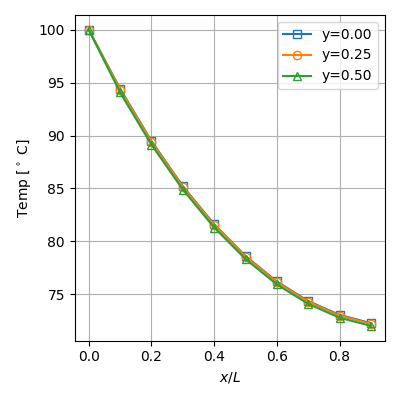

In [32]:
fig0,ax0 = plt.subplots(figsize=(4,4))
ax0.plot(x_bar,Txy[0,:],marker='s',markerfacecolor='none',label='y=%.2f'%y_bar[0])
ax0.plot(x_bar,Txy[1,:],marker='o',markerfacecolor='none',label='y=%.2f'%y_bar[1])
ax0.plot(x_bar,Txy[2,:],marker='^',markerfacecolor='none',label='y=%.2f'%y_bar[2]);
ax0.set_xlabel('$x/L$')
ax0.set_ylabel('Temp [$^\circ$ C]');
ax0.grid()
ax0.legend()
fig0.tight_layout()

$$\text{Bi} = \frac{\bar h th}{2 k}$$

###### Relevante en este problema 2D

In [33]:
Bi = h_bar*th/2/k
print('Biot = %.2f'%Bi)

Biot = 0.01


## Eficiencia

### $$\eta = \frac{\dot q_{aleta}}{2\bar h W L(T_0-T_\infty)}$$

In [34]:
eta_i=(2*k/(h_bar*lambdai*L**2))*np.sinh(lambdai*th/2)/(k*lambdai*np.sinh(lambdai* th/2)/h_bar+
np.cosh(lambdai*th/2))

### $$\eta_i = \frac{2 k}{\bar h L^2}\sum_{i=0}^\infty \frac{\displaystyle \sinh\left(\lambda_i \frac{th}{2}\right)}{\lambda_i\displaystyle \left[\frac{k\lambda_i}{\bar h}\sinh\left(\lambda_i\frac{th}{2}\right)+\cosh\left(\lambda_i\frac{th}{2}\right)\right]} $$ 

### Para el problema 1D
### $$\eta_{1D} = \frac{\tanh\left(mL\right)}{mL}$$
### donde $$mL=\sqrt{\frac{\bar h 2}{k th}}L$$

In [35]:
k

50.0

<IPython.core.display.Javascript object>


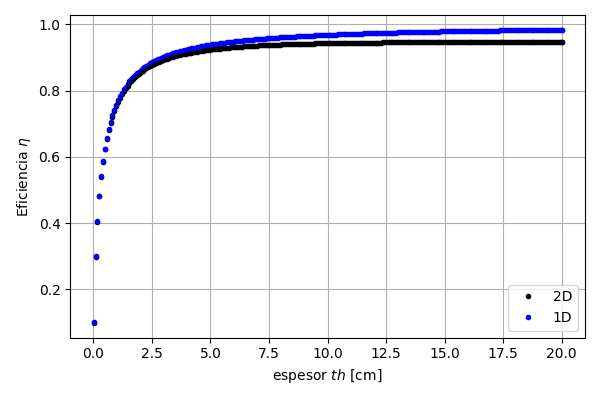

In [36]:
k = 50 
th_s = np.linspace(0.01,20,250)*1e-2
fig1,ax1 = plt.subplots(figsize=(6,4))
for th_i in th_s:
    ax1.plot(th_i/1e-2,eta_aleta(th_i,L,k,h_bar),'k.')
    ax1.plot(th_i/1e-2,eta_1D(th_i,L,k,h_bar),'b.')
ax1.plot(th_i/1e-2,eta_aleta(th_i,L,k,h_bar),'k.',label='2D')
ax1.plot(th_i/1e-2,eta_1D(th_i,L,k,h_bar),'b.',label='1D')   
ax1.legend()
ax1.grid()
ax1.set_xlabel('espesor $th$ [cm]')
ax1.set_ylabel('Eficiencia $\eta$');
fig1.tight_layout()

In [37]:
th =3e-2
L=5e-2
W = 20e-2
acero = ht.nearest_material('steel')
k = ht.k_material(acero)
h_bar=100
T_b=100
T_infinity=20

#Geometría
y_bar = 0.5
x_bar = 0.5
y = y_bar*th
x = x_bar*L


#número de términos de la serie
N = 100

In [38]:
i_serie = np.arange(0,N)
lambdai = (1+2*i_serie)*np.pi/(2*L)
Ci = 2*(T_infinity-T_b)/(L*lambdai*(k*lambdai * np.sinh(lambdai*th/2)/h_bar+np.cosh(lambdai*th/2)))
thetai = Ci*np.sin(lambdai*x)*np.cosh(lambdai*y)
theta = thetai.sum()
Temp = theta+T_b

In [39]:
y_bar = np.array([0,0.25,0.5])
x_bar = np.arange(0,1,0.1)
y = y_bar*th
x = x_bar*L

XBAR,YBAR = np.meshgrid(x_bar,y_bar)

Txy = np.zeros_like(XBAR)

for i1,ybari in enumerate(y_bar):
    y = ybari * th 
    for i2,xbari in enumerate(x_bar):
        x = xbari*L
        Txy[i1,i2] = temp_aleta(x,y,th,L,k,h_bar,T_infinity,T_b)
    

<IPython.core.display.Javascript object>


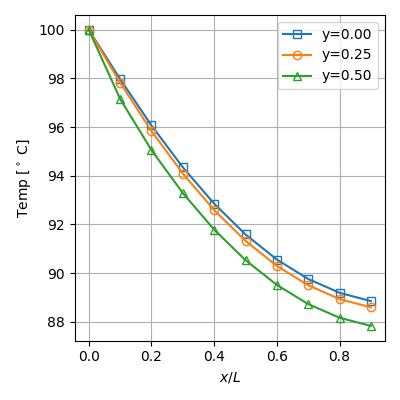

In [40]:
fig0,ax0 = plt.subplots(figsize=(4,4))
ax0.plot(x_bar,Txy[0,:],marker='s',markerfacecolor='none',label='y=%.2f'%y_bar[0])
ax0.plot(x_bar,Txy[1,:],marker='o',markerfacecolor='none',label='y=%.2f'%y_bar[1])
ax0.plot(x_bar,Txy[2,:],marker='^',markerfacecolor='none',label='y=%.2f'%y_bar[2]);
ax0.set_xlabel('$x/L$')
ax0.set_ylabel('Temp [$^\circ$ C]');
ax0.grid()
ax0.legend()
fig0.tight_layout()

<IPython.core.display.Javascript object>


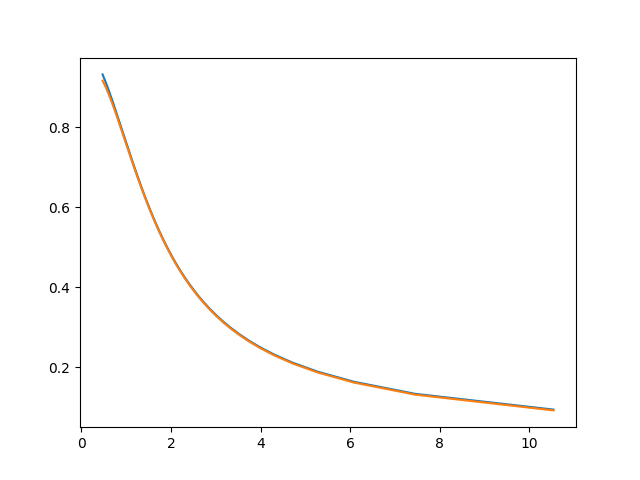

In [41]:
th = np.linspace(0.01,5,500)*1e-2
k = 45
mL = (h_bar*2/(k*th))**0.5*L
etas_1D = np.zeros_like(mL)
etas_2D = np.zeros_like(mL)
for i,thi in enumerate(th):
    etas_1D[i] = eta_1D(thi, L, k, h_bar)
    etas_2D[i] = eta_aleta(thi,L,k,h_bar)

fig1,ax1 = plt.subplots()
ax1.plot(mL,etas_1D)
ax1.plot(mL,etas_2D)

### El Asedio de Siracusa
Proponemos calcular el tiempo $t_i$ de inflamación de las velas a partir de las siguientes hipótesis:

* El Sol radia como un cuerpo negro de temperatura $T_S$.
* La atmósfera transmite hacia la superficie terrestre una fracción $\tau$ de la radiación solar total.
* Arquímides utilizó escudos reflectantes equivalentes a un espejo esférico cóncavo, de diámetro útil $d$ y de distancia focal $f$. Consideremos, para simplificar, que este espejo funciona como una lente parfectamente transparente que focaliza la imagen del Sol sobre la vela de un barco suponiendo Sol, lente y barco alineados.
* La radiación ambiente es despreciable asi como la de la vela.

#### resolver
1. Establecer que la expresión $E$ para el flujo de calor radiativo sobre la vela vale 
	\begin{equation}
	E = \tau \frac{d^2}{4f^2}\sigma T_S^4 = 10.1kW/m^2
	\end{equation}
2. Dado el espesor delgado de la vela, podemos estimar un tiempo de inflamación suponiendo que la parte calentada desde los escudos se comporta uniformemente, sin intercambio de conducción con el resto de la vela. La absortividad total de la tela de la vela en relación a la radiación solar es $\alpha_S = 0.6$ El coeficiente de intercambio convectivo con el aire ambiente es uniforme y constante $h=10W/m^2K$. Sea $T_F(t)$ la temperatura del punto F y $T_a$ la del aire ambiente:
    a. Establecer una ley de evolución para $T_F$ del tipo:
\begin{equation}
		t_c\frac{d\theta}{d t}+\theta = \theta_0
\end{equation}
donde $\theta(t) = T_F(t)-T_a$, $t_c$ y $\theta_0$ son constantes que se calculan a partir de los datos numéricos.
    
    b. Determinar  y discutir un valor numérico para $t_i$: ¿la toma de Siracusa pudo retardarse debido a este estratagema?
    
    c. Demostrar que si el diámetro útil $d$ del espejo es inferior a un valor crítico, no puede esperarse lograr incendiar las velas.
	

##### Datos numéricos:

*  $T_S = 5800 K,~~~\tau = 0.70,~~~ d = 1.5m,~~~ f = 50m$
* $\mu = 0.5kg/m^2$ masa de un metro cuadrado de vela.
* $C=1000 J/kg K$, capacidad calorífica de la vela.
* $T_i = 400^\circ C$ Temperatura de inflamación de la vela.
* $T_a= 25^\circ C$ Temperatura ambiente.
* $\beta_S = 4.6$mrd mitad del ángulo según el cual se ve el disco solar desde la Tierra.



In [42]:
h = 10
alfa_s = 0.6
Ts = 5800; tau = 0.70 ; d = 1.5; f = 50
mu = 0.5 ; C = 1000 ; Ti = 400+273; Ta = 25+273
beta = 4.6e-3 ;  sigma = 5.67e-8  #stefan boltzmann
Ls = 150e6*1e3
Rs = beta*f

In [43]:
flujo_solar = tau * Ls*np.pi*beta**2*Rs**2
E  = tau * d**2 / f**2 / 4 * sigma*Ts**4

\begin{align}
\mu C \frac{dT_f}{dt}+2h(T_F-T0) = E\\
t_F = \frac{\mu C}{2 h}
\end{align}

In [44]:
tf = mu*C / (2*h)
display(Latex(f'$t_F$:{tf:.2f}s'))

<IPython.core.display.Latex object>

In [45]:
k_algodon = 0.05
densidad_algodon = 400
gramaje = 0.340 #kg / m2
espesor = gramaje / densidad_algodon
Biot =  h * espesor / (2*k_algodon )
display(Latex(f'Biot={Biot:.2g}'))

<IPython.core.display.Latex object>

 solucion ec. dif lineal = cte
 
 $${\displaystyle {\frac {dy}{dx}}+\alpha y(x)=f(x)}$$
 Caso particular $f ( x ) = b = cte. {\displaystyle \scriptstyle f(x)=b={\text{cte.}}} {\displaystyle \scriptstyle f(x)=b={\text{cte.}}} y x 0 = 0 {\displaystyle \scriptstyle x_{0}=0} {\displaystyle \scriptstyle x_{0}=0}$, la solución es: 
 $${\displaystyle y(x)=y_{0}e^{-\alpha x}+{\frac {b}{\alpha }}(1-e^{-\alpha x})}$$

In [46]:
t = np.linspace(0,200,500)
Tinicial = 20+273
alfa = (2*h)/(mu*C)
b = E / (mu*C)

deltaTemp = 0*np.exp(-t*alfa) +b*(1-np.exp(-t*alfa))/alfa
Temp = Tinicial+ deltaTemp
t_ignicion = t[np.abs(Temp-Ti).argmin()]

<IPython.core.display.Javascript object>


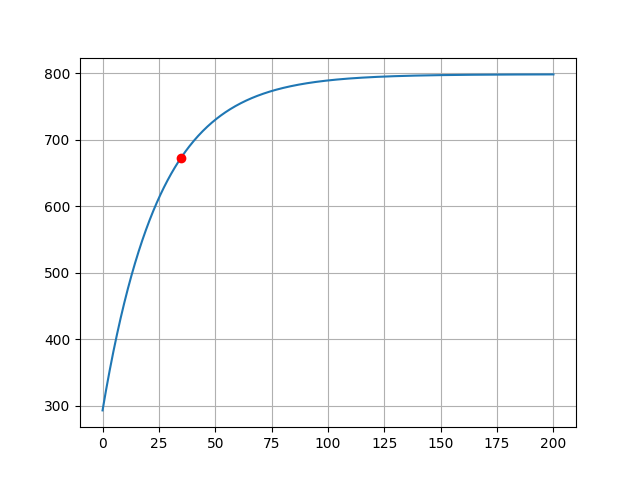

In [47]:
fig,ax = plt.subplots()
ax.plot(t,Temp)
ax.plot(t_ignicion,Ti,'ro')
ax.grid()


In [48]:
#ignicion posible si

theta_critico = Ti -Tinicial

def diam_cr(d):
    Tcalc = alfa_s*(tau * d**2 / f**2 / 4 * sigma*Ts**4)/h
    return theta_critico- Tcalc


In [49]:
diam_critico = optimize.brentq(diam_cr, 0,3)
display(Latex(f'Diámetro Crítico: {diam_critico:.2f}m'))

<IPython.core.display.Latex object>

## Ventanas
<figure class="half" style="display:flex">
    <img style="width:150px" src="../figures/ventana_1.png">
    <img style="width:150px" src="../figures/ventana_2.png">
</figure>

Una ventana de 2 metros de alto y $1.2$m de ancho cuenta con un vidrio simple de espesor $e_{vidrio}$=6mm y tiene una conductividad $k_v = 1.4$W/m$\cdot$K. Considere que un día frío de invierno, por la noche, la temperatura exterior es de $T_{a,e}=5^\circ$C y que la temperatura al interior es $T_{a,i}=20^\circ$C.

     1. Estimar el flujo de calor a través de la ventana si suponemos al aire externo lejos de la ventana, quieto. 
    2. Considere el caso de una ventana de doble vidrio, donde una nueva placa se introduce a una distancia de 12 mm de la primera. Entre ambas placas hay aire seco a presión atmosférica. ¿Cuál será el nuevo flujo de calor?
	3. Grafique el flujo de calor para cada una de las ventanas en función de la temperatura externa si ésta se encuentra comprendida en el rango [-5,10]$^\circ$C.

In [50]:
Tamb = 20
Tae = 5
alto, ancho, esp = [2,1.2,6e-3]
kvidrio = 1.4
d = 12e-3
g = 9.8

### Ventana simple

In [67]:
#primera iteracion
Tv_1 = (Tamb+Tae)/2+1.75

T_ref1 = (Tamb + Tv_1)/2

Pr_1 = cp.CoolProp.PropsSI('Prandtl','T',T_ref1+273,'P',101.3e3,'Air')
rho_1 = cp.CoolProp.PropsSI('D','T',T_ref1+273,'P',101.3e3,'Air')
mu_1 = cp.CoolProp.PropsSI('V','T',T_ref1+273,'P',101.3e3,'Air')
k_1 = cp.CoolProp.PropsSI('L','T',T_ref1+273,'P',101.3e3,'Air')
nu_1 = mu_1 / rho_1
beta_1 = cp.CoolProp.PropsSI('ISOBARIC_EXPANSION_COEFFICIENT','T',T_ref1+273,'P',101.3e3,'Air')

Grashof_1 = beta_1*(Tamb-Tv_1)*g*alto**3/nu_1**2


$${\displaystyle \mathrm {Gr} ={\frac {\beta \ (T_{s}-T_{\infty })\ g\ V}{\nu ^{2}}}}$$



In [68]:
Nu_1 = ht.conv_free_immersed.Nu_free_vertical_plate(Pr_1,Grashof_1)

h_1 = Nu_1 * k_1 / alto
q_1 = h_1*(Tamb-Tv_1)

Tv_2 = Tv_1 - q_1*esp/k_1

T_ref2 = (Tae + Tv_2)/2
Pr_2 = cp.CoolProp.PropsSI('Prandtl','T',T_ref1+273,'P',101.3e3,'Air')
rho_2 = cp.CoolProp.PropsSI('D','T',T_ref1+273,'P',101.3e3,'Air')
mu_2 = cp.CoolProp.PropsSI('V','T',T_ref1+273,'P',101.3e3,'Air')
k_2 = cp.CoolProp.PropsSI('L','T',T_ref1+273,'P',101.3e3,'Air')
nu_2 = mu_1 / rho_1
beta_2 = cp.CoolProp.PropsSI('ISOBARIC_EXPANSION_COEFFICIENT','T',T_ref1+273,'P',101.3e3,'Air')

Grashof_2 = beta_2*(Tv_2-Tae)*g*alto**3/nu_2**2

Nu_2 = ht.conv_free_immersed.Nu_free_vertical_plate(Pr_2,Grashof_2)

h_2 = Nu_2 * k_2 / alto
display(Latex(f'Flujo de Calor 1: {h_1*(Tamb-Tv_1):.2f}w/m$^2$'))
display(Latex(f'Flujo de Calor 2: {h_2*(Tv_2-Tae):.2f}w/m$^2$'))
display(Latex(f'Temperatura vidrio 1: {Tv_1:.1f}$^\circ C$'))
display(Latex(f'Temperatura vidrio 2: {Tv_2:.1f}$^\circ C$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [66]:
Nu_1,Nu_2

(221.54379513163258, 157.34855681357774)

In [60]:
Nu_1 * k_1 / alto

2.601704356669565

In [61]:
h_1*(Tamb-Tv_1)

14.959800050849998

In [62]:
h_1*(293-285)

20.81363485335652